<a href="https://colab.research.google.com/github/sardesd/Coronary-Heart-Disease-Classification/blob/main/Cardiovascular_risk_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Coronary Heart Disease Classification**



##### **Project Type**    - Classification
##### **Contribution**    - Siddharth Vijay Sardesai

# **Project Summary -**

The goal of this project is to predict the likelihood of a patient developing Coronary Heart Disease (CHD) within ten years (TenYearCHD). We will be using a dataset that includes several health-related features such as age, education, sex, smoking status, number of cigarettes per day, blood pressure medication usage, prevalence of stroke, prevalence of hypertension, diabetes status, total cholesterol, systolic blood pressure, diastolic blood pressure, body mass index, heart rate, and glucose level.

Our approach will involve the following steps:

1. Data Preprocessing: We will clean and preprocess the data, handling any missing values, outliers, or skewed distributions as necessary. For categorical variables like sex and smoking status, we may use techniques like binary encoding.

2. Feature Selection/Engineering: We will analyze the relationships between the different features and the target variable to identify the most relevant features. We may also create new features if it can improve the model’s performance.

3. Model Selection: We will experiment with various machine learning models suitable for binary classification tasks, such as K-Nearest Neighbors (KNN), Random Forest, XGBoost, Support Vector Classifier (SVC), and others. We will also explore ensemble methods like Voting Classifier to combine the strengths of multiple models.

4. Hyperparameter Tuning: We will use techniques like GridSearchCV or RandomizedSearchCV to find the optimal hyperparameters for our models.

5. Model Evaluation: We will evaluate our models using appropriate metrics such as accuracy, precision, recall, F1 score, and Area Under the ROC Curve (AUC-ROC). We will also plot the ROC curves of our models to visualize their performance.

By the end of this project, we aim to have a robust and accurate model that can help in predicting the likelihood of a patient developing CHD within ten years, potentially aiding in early detection and treatment planning.

# **GitHub Link -**

Provide your GitHub Link here.

# ***Let's Begin !***

## ***Know Your Data***

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder, PowerTransformer,RobustScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scipy.stats as stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, RocCurveDisplay, auc

from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso


# Model evaluation and hyperparameter tuning
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

# Feature selection
from sklearn.feature_selection import SelectFromModel,SelectKBest, f_classif, chi2
from sklearn.linear_model import LassoCV

# Ensemble methods
from sklearn.ensemble import VotingClassifier
from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [ ]:
# Load Dataset
path='/content/drive/MyDrive/data_cardiovascular_risk.csv'
database=pd.read_csv(path)

In [ ]:
df=database.copy()

### Dataset First View

In [ ]:
# Dataset First Look
df.sample(10).T

,2283,533,1623,3,1231,2974,1005,2643,575,2275
id,2283,533,1623,3,1231,2974,1005,2643,575,2275
age,39,54,41,50,44,42,62,43,47,68
education,4.0,1.0,2.0,1.0,1.0,4.0,1.0,3.0,3.0,1.0
sex,F,M,F,M,F,F,M,F,M,M
is_smoking,NO,YES,NO,YES,YES,NO,YES,NO,YES,NO
cigsPerDay,0.0,20.0,0.0,20.0,20.0,0.0,20.0,0.0,20.0,0.0
BPMeds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
prevalentStroke,0,0,0,0,0,0,0,0,0,0
prevalentHyp,0,0,0,1,0,0,1,0,1,1
diabetes,0,0,0,0,0,0,0,0,0,1


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
num_rows = df.shape[0]

num_cols = df.shape[1]

print(f"The DataFrame has {num_rows} rows and {num_cols} columns.")

The DataFrame has 3390 rows and 17 columns.


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dupli= df.duplicated()


num_dupli = dupli.sum()

print(f"The DataFrame has {num_dupli} duplicated rows.")

The DataFrame has 0 duplicated rows.


#### Missing Values/Null Values

We will use KNNimputer to help with null value imputation.

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
#Calling knnImputer
imputer = KNNImputer(n_neighbors=5)

In [ ]:
#columns with missing values
columns_with_missing_values = ['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

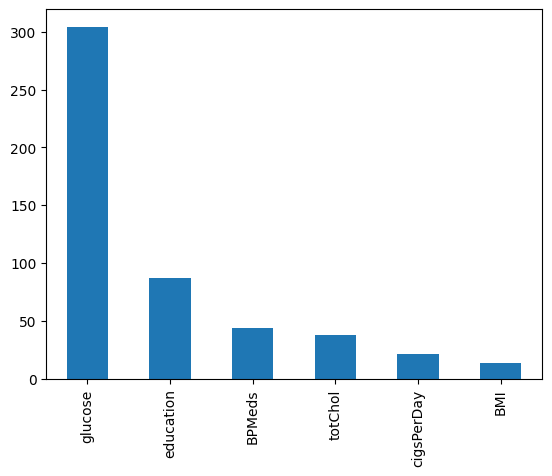

In [ ]:
# Visualizing the missing values
df.isnull().sum().sort_values(ascending=False)[:6].plot(kind='bar')
plt.show()

In [ ]:
#Imputation for null values
df[columns_with_missing_values] = imputer.fit_transform(df[columns_with_missing_values])

In [ ]:
#Checking for null values again
df.isnull().sum()

id                  0
age                 0
education          87
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

In [ ]:
# Categorising numerical columns
numerical_columns=[ 'age', 'heartRate','cigsPerDay',
       'diaBP', 'sysBP', 'glucose', 'totChol', 'BMI']

In [ ]:
# Loop over each column in the dataframe
for col in df[numerical_columns].columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
#Checking fo null values again
df.isnull().sum()

id                  0
age                 0
education          87
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

In [ ]:
# Dropping remaining rest of the null values
df.dropna(inplace=True)

In [ ]:
# Are all null values taken care of?
if 0==df.isnull().sum().sum():
  print('Yes')
else:
  print('No')

Yes


## ***Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3303.000000,3303.000000,3303.000000,3303.000000,3303.000000,3303.000000,3303.000000,3303.000000,3303.000000,3303.000000,3303.000000,3303.000000,3303.000000,3303.000000,3303.000000
mean,1697.187103,49.520739,1.970936,9.127581,0.029912,0.006661,0.315774,0.025431,236.993400,132.648804,82.866939,25.770194,76.062610,82.076113,0.150772
std,980.630795,8.588484,1.019081,11.856831,0.169086,0.081353,0.464894,0.157455,44.489722,22.344737,12.064193,4.118644,12.002479,23.341722,0.357881
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,848.500000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,22.985000,68.000000,72.000000,0.000000
50%,1699.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.500000,82.000000,25.350000,75.000000,78.000000,0.000000
75%,2547.500000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,27.970000,83.000000,86.900000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description

In [ ]:
df.select_dtypes(include='number').columns

Index(['id', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


1. age: The age of the individual, indicating the number of years since birth.
education: The individual's level of education.


2. cigsPerDay: The number of cigarettes smoked by the individual per day.

3. BPMeds: A binary indicator of whether the individual is on blood pressure medication.

4. prevalentStroke: A binary indicator of whether the individual has a history of stroke.

5. prevalentHyp: A binary indicator of whether the individual has prevalent hypertension.

6. diabetes: A binary indicator of whether the individual has diabetes.

7. totChol: The total cholesterol levels of the individual.

8. sysBP: The systolic blood pressure reading of the individual.

9. diaBP: The diastolic blood pressure reading of the individual.

10. BMI: The Body Mass Index, a measure of body fat based on height and weight.

11. heartRate: The heart rate or pulse of the individual.

12. glucose: The glucose levels in the individual's blood.

13. TenYearCHD: A binary target variable indicating the presence of coronary heart disease within the next ten years.

In [ ]:
df.select_dtypes(exclude='number').columns

Index(['sex', 'is_smoking'], dtype='object')

1. sex: The gender of the individual, distinguishing between male and female.

2. is_smoking: A binary indicator denoting whether the individual is a smoker or not.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique().sort_values()

prevalentHyp          2
diabetes              2
prevalentStroke       2
is_smoking            2
TenYearCHD            2
sex                   2
BPMeds                3
education             4
age                  39
cigsPerDay           41
heartRate            69
diaBP               142
sysBP               226
glucose             233
totChol             268
BMI                1262
id                 3303
dtype: int64

BPmeds should only have two values, we will correct that.

<Axes: xlabel='BPMeds', ylabel='count'>

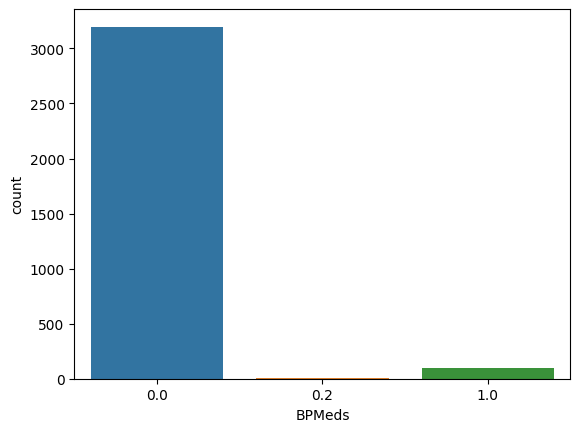

In [ ]:
sns.countplot(x=df['BPMeds'])

In [ ]:
df= df[df['BPMeds'] != 0.2]

<Axes: xlabel='BPMeds', ylabel='count'>

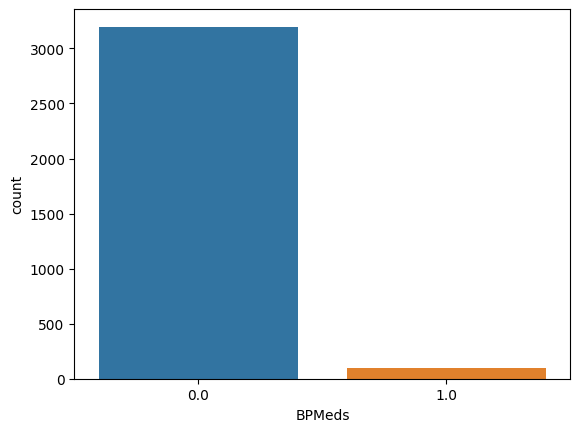

In [ ]:
sns.countplot(x=df['BPMeds'])

In [ ]:
df.select_dtypes(include='number').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3294 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3294 non-null   int64  
 1   age              3294 non-null   int64  
 2   education        3294 non-null   float64
 3   cigsPerDay       3294 non-null   float64
 4   BPMeds           3294 non-null   float64
 5   prevalentStroke  3294 non-null   int64  
 6   prevalentHyp     3294 non-null   int64  
 7   diabetes         3294 non-null   int64  
 8   totChol          3294 non-null   float64
 9   sysBP            3294 non-null   float64
 10  diaBP            3294 non-null   float64
 11  BMI              3294 non-null   float64
 12  heartRate        3294 non-null   float64
 13  glucose          3294 non-null   float64
 14  TenYearCHD       3294 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 411.8 KB


## 3. ***Data Wrangling***

### Data Wrangling Code

We will divide our dataset into categorical and numerical for future use. Note that some categoris are still text based.

In [ ]:
# Categorical columns
categorical_columns = ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

#Numerical columns
numerical_columns=[ 'age', 'heartRate','cigsPerDay',
       'diaBP', 'sysBP', 'glucose', 'totChol', 'BMI']


In [ ]:
df[numerical_columns].describe()

,age,heartRate,cigsPerDay,diaBP,sysBP,glucose,totChol,BMI
count,3294.0,3294.0,3294.0,3294.0,3294.0,3294.0,3294.0,3294.0
mean,49.515179,76.06187,9.14493,82.853218,132.634487,82.084517,236.934851,25.769633
std,8.588949,12.005286,11.86648,12.039669,22.329055,23.36843,44.412937,4.120157
min,32.0,45.0,0.0,48.0,83.5,40.0,107.0,15.96
25%,42.0,68.0,0.0,74.5,117.0,72.0,206.0,22.98
50%,49.0,75.0,0.0,82.0,128.5,78.0,234.0,25.35
75%,56.0,83.0,20.0,90.0,144.0,86.95,263.75,27.97
max,70.0,143.0,70.0,142.5,295.0,394.0,600.0,56.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3294 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3294 non-null   Int64  
 1   age              3294 non-null   Int64  
 2   education        3294 non-null   Int64  
 3   sex              3294 non-null   string 
 4   is_smoking       3294 non-null   string 
 5   cigsPerDay       3294 non-null   Float64
 6   BPMeds           3294 non-null   Int64  
 7   prevalentStroke  3294 non-null   Int64  
 8   prevalentHyp     3294 non-null   Int64  
 9   diabetes         3294 non-null   Int64  
 10  totChol          3294 non-null   Float64
 11  sysBP            3294 non-null   Float64
 12  diaBP            3294 non-null   Float64
 13  BMI              3294 non-null   Float64
 14  heartRate        3294 non-null   Float64
 15  glucose          3294 non-null   Float64
 16  TenYearCHD       3294 non-null   Int64  
dtypes: Float64(7),

## ***Data Vizualization***

#### Univariate analysis

For categorical features we will us countplots. We will check for outliers using boxplots.

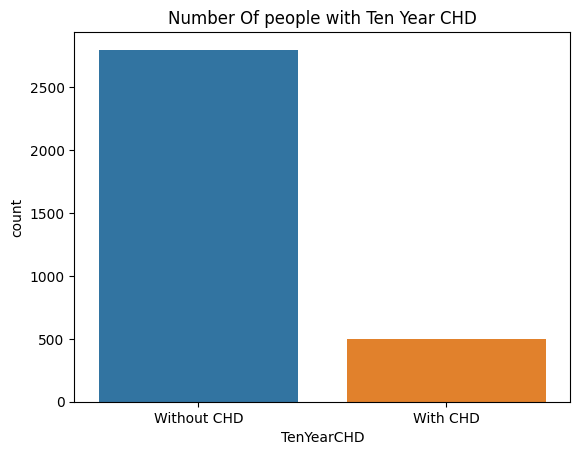

In [ ]:
#Bike count distribution
sns.countplot(x=df['TenYearCHD'])
plt.title('Number Of people with Ten Year CHD')
plt.xticks([0, 1], ['Without CHD', 'With CHD'])
plt.show()

Our target variable is imbalanced, we will have to fix that later.

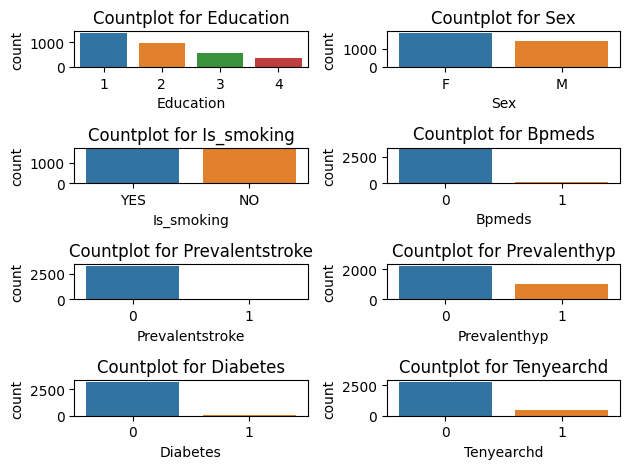

In [ ]:
rows = 4
cols = 2
for i, column in enumerate(df[categorical_columns]):
    plt.subplot(rows, cols, i+1)
    sns.countplot(x=df[column])
    title = f'Countplot for {column.capitalize()}'
    xlabel = column.capitalize()

    plt.title(title)
    plt.xlabel(xlabel)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

Most categorical variables are seriously imbalanced.

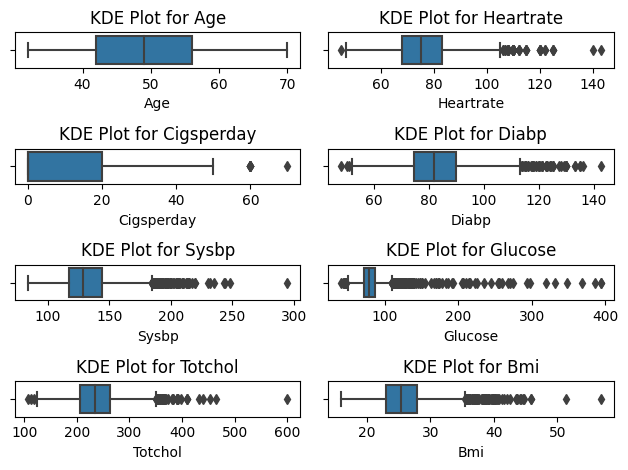

In [ ]:
# Function
for i, column in enumerate(numerical_columns):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(data=df, x=column)
    title = f'KDE Plot for {column.capitalize()}'
    xlabel = column.capitalize()

    plt.title(title)
    plt.xlabel(xlabel)

plt.tight_layout()
plt.show()

Most numerical features, have serious outliers.

In [ ]:
#Columns to correct
col_ds=['heartRate','cigsPerDay','sysBP','glucose','totChol','BMI','diaBP']

In [ ]:
for col_name in col_ds:
    # Calculate the quartiles and IQR for the current column
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1

    # Calculate the lower and upper bounds for clipping
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Clip the outliers for the current column
    df[col_name] = df[col_name].clip(lower=lower_bound, upper=upper_bound)


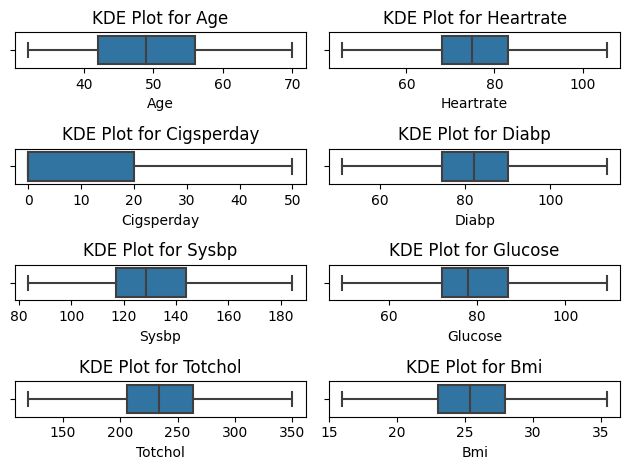

In [ ]:
for i, column in enumerate(numerical_columns):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(data=df, x=column)
    title = f'KDE Plot for {column.capitalize()}'
    xlabel = column.capitalize()

    plt.title(title)
    plt.xlabel(xlabel)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

We have successfully removed all outliers.

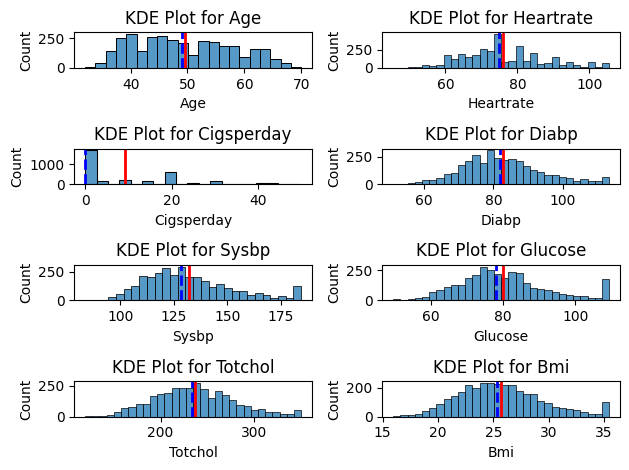

In [ ]:
# Now lets compare numerical variables
for i, column in enumerate(numerical_columns):
    plt.subplot(rows, cols, i+1)
    sns.histplot(data=df, x=column, fill=True)
    plt.axvline(df[column].median(), color='blue', linestyle='dashed', linewidth=2)
    plt.axvline(df[column].mean(), color='red', linewidth=2)
    title = f'KDE Plot for {column.capitalize()}'
    xlabel = column.capitalize()

    plt.title(title)
    plt.xlabel(xlabel)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

We can clearly observe how most ditributions are right skewed even after removing outliers.

#### Bivariate Analysis

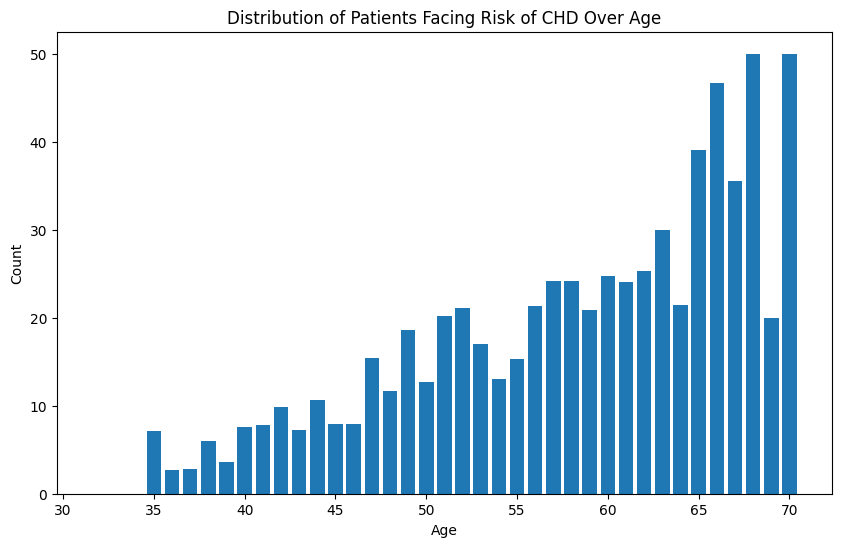

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(10, 6))
age_chd=df.groupby('age')['TenYearCHD'].mean() * 100
plt.bar(age_chd.index,age_chd.values)
plt.title('Distribution of Patients Facing Risk of CHD Over Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

We can clearly observe how risk increaces with age.

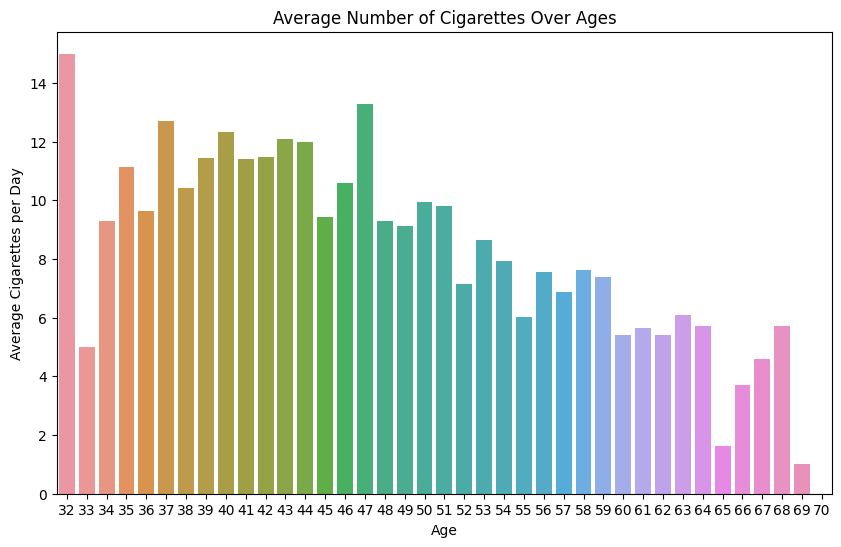

In [ ]:

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Create the line plot on the axis
sns.barplot(ax=ax, x=df['age'], y=df['cigsPerDay'],estimator=np.mean, ci=None)

# Set the title and labels
ax.set_title('Average Number of Cigarettes Over Ages')
ax.set_xlabel('Age')
ax.set_ylabel('Average Cigarettes per Day')

# Display the plot
plt.show()


A big chunk of people between 35 and 50 seem to engage in smoking the most.

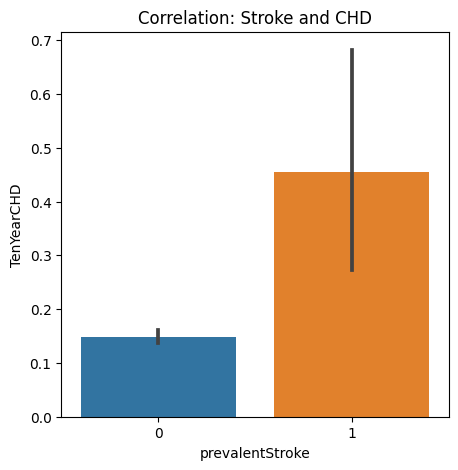

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(5, 5))
#sns.heatmap(df[['prevalentStroke', 'TenYearCHD']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
sns.barplot(x='prevalentStroke', y='TenYearCHD', data=df, estimator=np.mean)
plt.title('Correlation: Stroke and CHD')
plt.show()

Stroke seems more prevalent with people with coronary heart disease.

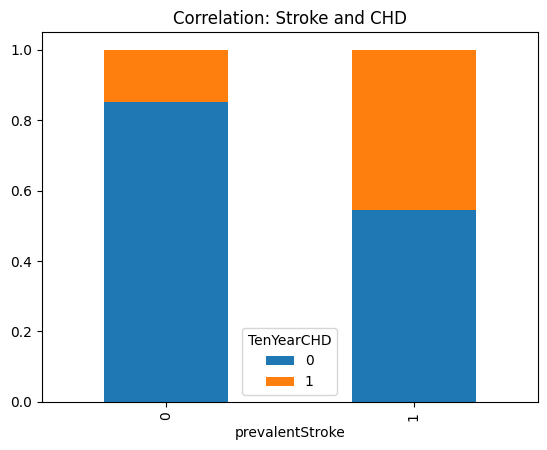

In [ ]:
#A cross tabular way to show the same result
table = pd.crosstab(df['prevalentStroke'], df['TenYearCHD'])
table = table.div(table.sum(axis=1), axis=0)

table.plot(kind='bar', stacked=True)
plt.title('Correlation: Stroke and CHD')

plt.show()

#### Multivariate Analysis

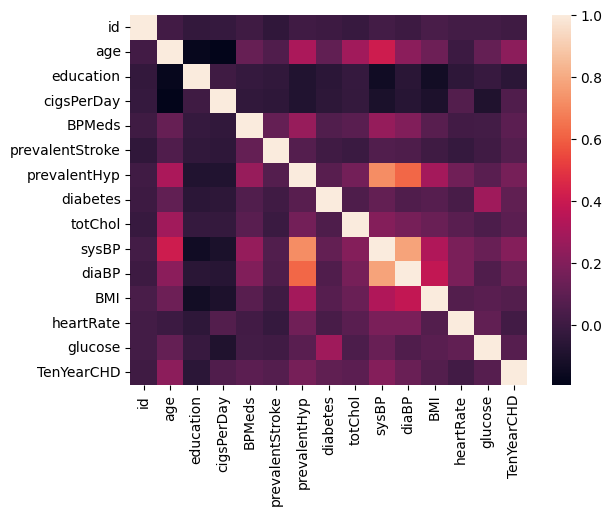

In [ ]:
# Correlational Heatmap
sns.heatmap(df.select_dtypes(include='number').corr())
plt.show()

We can see how blood pressure and hypertesnion are correlated.

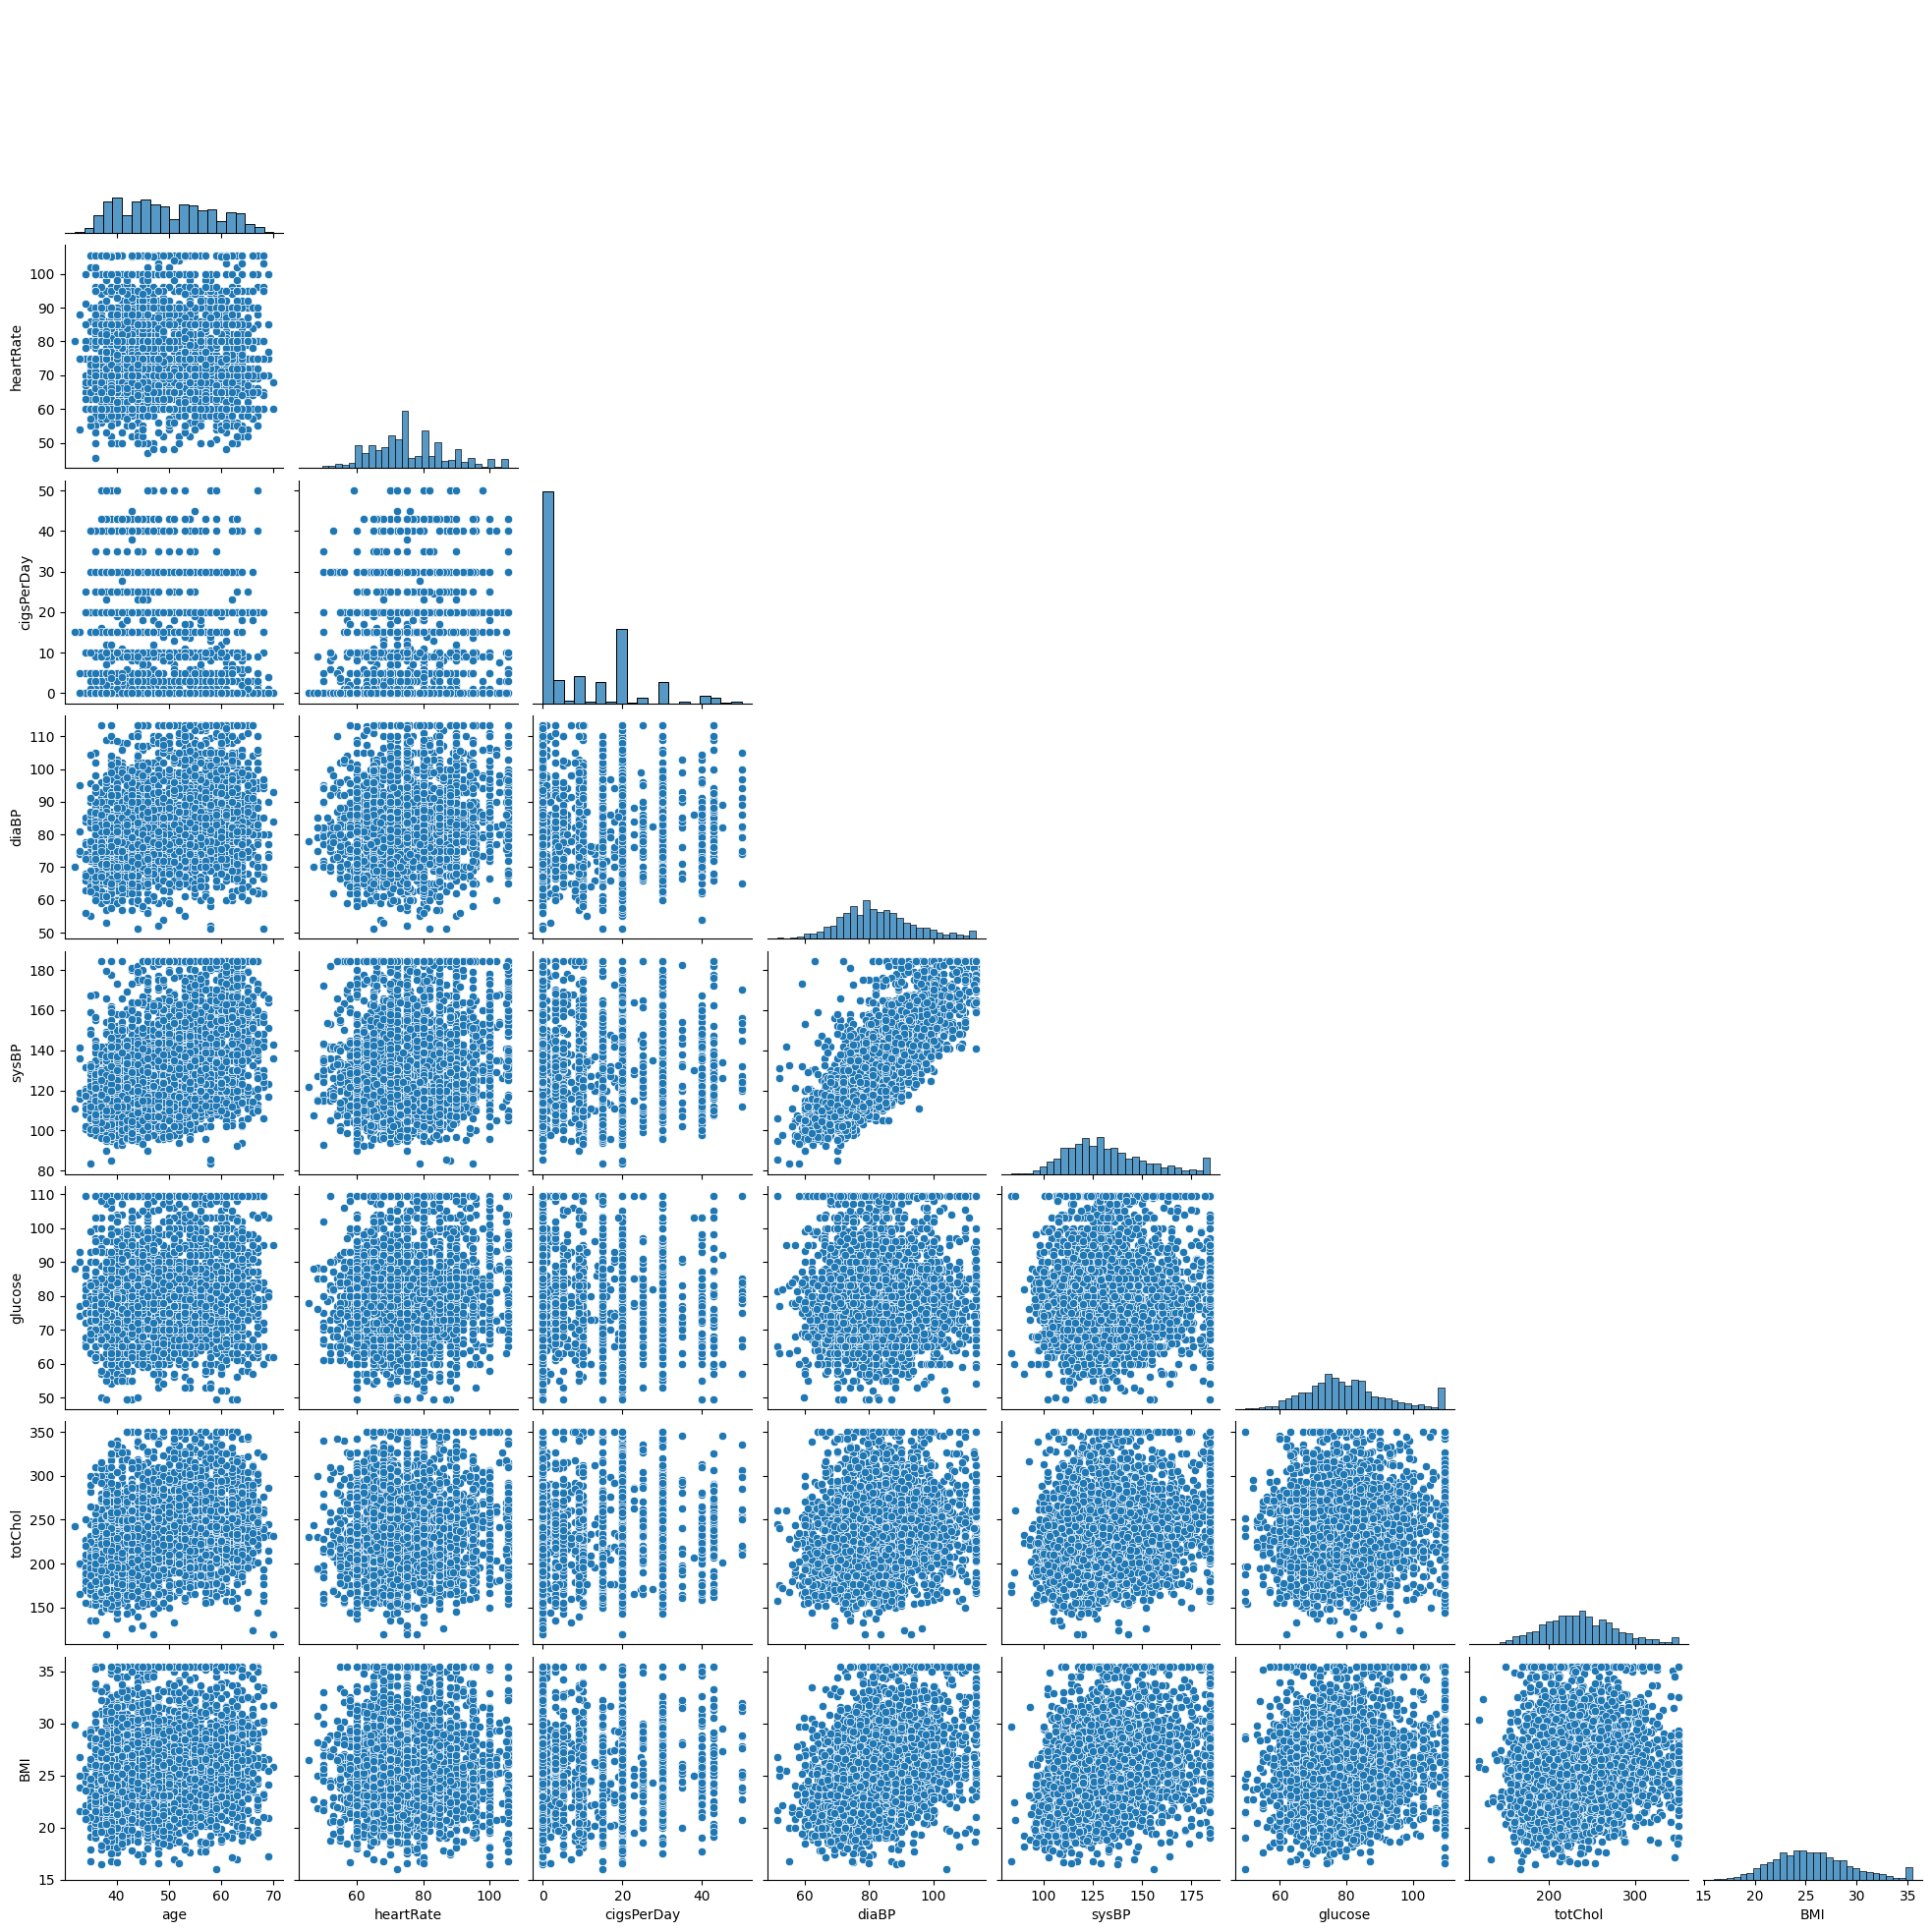

In [ ]:
sns.pairplot(df[numerical_columns],corner=True)
plt.show()

Outside of a slight correlation  between sysbp and diaBP there are no discernable patterns

## ***Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. Null hypothesis and alternate hypothesis.

1. Null Hypothesis (H0): There is no association between ‘sex’ and ‘is_smoking’.

2. Alternative Hypothesis (H1): There is an association between ‘sex’ and ‘is_smoking’.

#### 2. Performing an appropriate statistical test.

In [ ]:
# chi2 Test
contingency_table = pd.crosstab(df['sex'], df['is_smoking'])

chi2, p_val,_,_ = stats.chi2_contingency(contingency_table)

print(f'Chi-Square Test between sex and is_smoking:\nChi-Square Statistic: {chi2}\nP-Value: {p_val}\n')

Chi-Square Test between sex and is_smoking:
Chi-Square Statistic: 155.00085928630864
P-Value: 1.3996066615397776e-35



As P-values is much smaller than 0.05 therefore we can safely reject the null hypothesis.

### Hypothetical Statement - 2

#### 1. Null hypothesis and alternate hypothesis.

1. Null Hypothesis (H0): There is no association between ‘sex’ and ‘BPMeds’.

2. Alternative Hypothesis (H1): There is an association between ‘sex’ and ‘BPMeds’.

In [ ]:
# chi2 Test
contingency_table = pd.crosstab(df['sex'], df['BPMeds'])

chi2, p_val,_,_ = stats.chi2_contingency(contingency_table)

print(f'Chi-Square Test between sex and BPMeds:\nChi-Square Statistic: {chi2}\nP-Value: {p_val}\n')

Chi-Square Test between sex and BPMeds:
Chi-Square Statistic: 5.545490836485126
P-Value: 0.01852835972270478



As P-values is much smaller than 0.05 therefore we can safely reject the null hypothesis.

### Hypothetical Statement - 3

#### 1. Null hypothesis and alternate hypothesis.

1. Null Hypothesis (H0): There is no association between ‘diabetes’ and ‘prevalentStroke’ (whether a person had a stroke).

2. Alternative Hypothesis (H1): There is an association between ‘diabetes’ and ‘prevalentStroke’.

In [ ]:
# chi2 Test
contingency_table = pd.crosstab(df['diabetes'], df['prevalentStroke'])

chi2, p_val,_,_ = stats.chi2_contingency(contingency_table)

print(f'Chi-Square Test between sex and BPMeds:\nChi-Square Statistic: {chi2}\nP-Value: {p_val}\n')

Chi-Square Test between sex and BPMeds:
Chi-Square Statistic: 0.0
P-Value: 1.0



We cannot reject the null hypothesis.

## ***Machine Learning Models***

### Data Preprocessing

In [ ]:
#Ignoring errors
df = df.round().astype('int64', errors='ignore')

In [ ]:
#Dropping irrelevant column
df.drop('id', axis=1,inplace=True)

Now we will handle our target variable imbalace with SMOTE.

In [ ]:

from imblearn.over_sampling import SMOTE

from collections import Counter


# Encode categorical variables
df_binary_encoded = pd.get_dummies(df, columns=['sex', 'is_smoking'])

X = df_binary_encoded.drop('TenYearCHD', axis=1)
y = df_binary_encoded['TenYearCHD']

print(f'Before Handling Imbalanced class: {Counter(y)}')

# Apply SMOTE to handle imbalanced classes
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)


print(f'After Handling Imbalanced class: {Counter(y)}')


Before Handling Imbalanced class: Counter({0: 2798, 1: 496})
After Handling Imbalanced class: Counter({1: 2798, 0: 2798})


In [ ]:
# Test train split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [ ]:
# Scaler
scaler = make_pipeline(StandardScaler())

In [ ]:
# Encoding categorical variables
ohe = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

In [ ]:
selector = SelectKBest(f_classif)

In [ ]:
# Transformer
yeo_johnson_transformer = make_pipeline(PowerTransformer(method='yeo-johnson'))

In [ ]:
# objects to select non-numerical values
cat_cols=make_column_selector(dtype_exclude='number')

In [ ]:
# Final 'prep' column transformer
prep = make_column_transformer(
    (yeo_johnson_transformer, numerical_columns),
    (scaler, numerical_columns),

)


We will use same set of mertics across models, for which we will write a function.

In [ ]:
def evaluate_model_performance(clf, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    """
    Evaluate model performance on both training and test data and print out metrics.

    Parameters:
    clf : The trained model
    X_train : The training features
    y_train : The training target
    X_test : The test features
    y_test : The test target

    """
    # Predict the responses for train and test datasets
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Compute metrics for training data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)

    # Compute metrics for test data
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Print out the metrics
    print(f"Training Accuracy: {train_accuracy:.2f}, Precision: {train_precision:.2f}, Recall: {train_recall:.2f}, F1 Score: {train_f1:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}, Precision: {test_precision:.2f}, Recall: {test_recall:.2f}, F1 Score: {test_f1:.2f}")

### KNN Classifier

The K-Nearest Neighbors (KNN) algorithm is a type of instance-based learning method used in machine learning. It works by classifying a new instance based on the 'k' instances from the training data that are nearest to it. The new instance is assigned the most common class among its 'k' nearest neighbors.

In [ ]:
parameters = {'knn__n_neighbors': range(1, 10),
               'pca__n_components': range(2,15)
              }

knn = KNeighborsClassifier()
knn_pipe=Pipeline([('prep',prep),('pca', PCA()),('knn',knn)])
knn_clf = GridSearchCV(knn_pipe, parameters, cv=5, scoring='accuracy')
knn_clf.fit(X_train,y_train)

In [ ]:
evaluate_model_performance(knn_clf)

Training Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1 Score: 1.00
Test Accuracy: 0.79, Precision: 0.74, Recall: 0.90, F1 Score: 0.81


### Random Forest

Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. It’s effective because it reduces overfitting by averaging the results of many individual decision trees.

Random forest does not require scaling or tranformation as it a tree based method.

In [ ]:
rf_params = {'n_estimators': [200, 300, 400],     # number of trees in the ensemble
             'max_features': ["log2", "sqrt"],  # maximum number of features considered when splitting a node.
             'max_depth': [20, 30, 40],        # maximum number of levels allowed in each tree.
             'min_samples_split': [5, 6, 7],     # minimum number of samples necessary in a node to cause node splitting.
             'min_samples_leaf': [3, 4, 5, 6]}      # minimum number of samples which can be stored in a tree leaf.

# performing Hyperparameter Tunning using RandomizedSearchCV
rf = RandomForestClassifier()
rf_randomsearch = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, cv=5, verbose=2, n_jobs=-1)

# model fitting
rf_randomsearch.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [20, 30, 40],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [3, 4, 5, 6],
                                        'min_samples_split': [5, 6, 7],
                                        'n_estimators': [200, 300, 400]},
                   verbose=2)

In [ ]:
evaluate_model_performance(rf_randomsearch,X_test,y_test)

Training Accuracy: 0.86, Precision: 0.89, Recall: 0.82, F1 Score: 0.85
Test Accuracy: 0.86, Precision: 0.89, Recall: 0.82, F1 Score: 0.85


As a sidenote we can use the same model for feature importance.

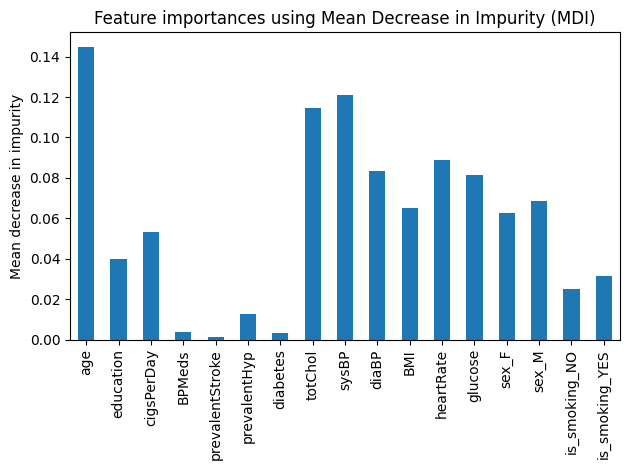

In [ ]:
# Compute the feature importances
rf.fit(X_train,y_train)
feature_names = X.columns
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

# Plot the impurity-based importance
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=None, ax=ax)
ax.set_title("Feature importances using Mean Decrease in Impurity (MDI)")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

We can clearly see how age is the most relevant factor.

### XGBoost

XGBoost, short for Extreme Gradient Boosting, is a powerful machine learning algorithm used in the field of machine learning and data science. It’s an implementation of gradient boosted decision trees designed for speed and performance. XGBoost is widely used because of its scalability and efficiency in handling large datasets.

XGBoost does not require scaling or tranformation as it a tree based method.

In [ ]:
xgb_params = {'n_estimators': [800, 900, 1000],    # number of trees in the ensemble
          'max_depth': [8,9,10],            # maximum number of levels allowed in each tree.
          'min_samples_split': [4,5,6],    # minimum number of samples necessary in a node to cause node splitting.
          'min_samples_leaf': [5,6,7],     # minimum number of samples which can be stored in a tree leaf.
          'learning_rate':[0.01, 0.1, 0.15]}         # optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.


# performing Hyperparameter Tunning using GridSearchCV
xgb = XGBClassifier()
xgb_randomsearch = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_params, cv=5, n_jobs=-1, verbose=2)

# model fitting
xgb_randomsearch.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.15],
                                        'max_depth': [8, 9, 10],
                                        'min_samples_leaf': [5, 6, 7],
                                        'min_samples_split': [4, 5, 6],
                                        'n_estimators': [800, 900, 1000]},
                   verbose=2)

In [ ]:
evaluate_model_performance(xgb_randomsearch,X_test,y_test)

Training Accuracy: 0.87, Precision: 0.88, Recall: 0.85, F1 Score: 0.87
Test Accuracy: 0.87, Precision: 0.88, Recall: 0.85, F1 Score: 0.87


### SVC

Support Vector Classifier is a type of Support Vector Machine (SVM) that is mainly used for classification tasks. It works by finding the hyperplane that best divides the dataset into classes. SVC is effective in high-dimensional spaces and is versatile as different Kernel functions can be specified for the decision function.

In [ ]:
svc_params = {
    'svc__C': [0.1, 1, 10, 100],  # Regularization parameter.
    'svc__kernel': ['linear', 'rbf'],  # Specifies the kernel type to be used in the algorithm.
    'svc__gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
}

# Initialize SVC
svc = SVC(probability=True)
svc_pipe=Pipeline([('prep',prep),('svc',svc)])

# Initialize RandomizedSearchCV
svc_randomsearch = RandomizedSearchCV(estimator=svc_pipe, param_distributions=svc_params, cv=5, verbose=2, n_jobs=-1)

# Fit RandomizedSearchCV
svc_randomsearch.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('powertransformer',
                                                                                                PowerTransformer())]),
                                                                               ['age',
                                                                                'heartRate',
                                                                                'cigsPerDay',
                                                                                'diaBP',
                                                                                'sysBP',
                                                                                'glucose',
                                                                                'totChol',
                                                                                'BMI']),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'heartRate',
                                                                                'cigsPerDay',
                                                                                'diaBP',
                                                                                'sysBP',
                                                                                'glucose',
                                                                                'totChol',
                                                                                'BMI'])])),
                                             ('svc', SVC(probability=True))]),
                   n_jobs=-1,
                   param_distributions={'svc__C': [0.1, 1, 10, 100],
                                        'svc__gamma': ['scale', 'auto'],
                                        'svc__kernel': ['linear', 'rbf']},
                   verbose=2)

In [ ]:
evaluate_model_performance(svc_randomsearch)

Training Accuracy: 0.91, Precision: 0.88, Recall: 0.95, F1 Score: 0.92
Test Accuracy: 0.78, Precision: 0.73, Recall: 0.87, F1 Score: 0.80


### Voting Classifier

 A Voting Classifier is a machine learning model that trains on an ensemble of several models and predicts an output class based on their highest probability of chosen class as the output78. It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting78.

We will now combine all our previous models.

In [ ]:
# Combine the models using VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('rf', rf_randomsearch.best_estimator_),
                ('xgb', xgb_randomsearch.best_estimator_),
                 ('knn', knn_clf.best_estimator_),
                ('scv', svc_randomsearch.best_estimator_)

                ],
    voting='soft'
)

# Fit the VotingClassifier
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=40,
                                                     max_features='log2',
                                                     min_samples_leaf=3,
                                                     min_samples_split=6,
                                                     n_estimators=300)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_...
                                               ColumnTransformer(transformers=[('pipeline-1',
                                                                                Pipeline(steps=[('powertransformer',
                                                                                                 PowerTransformer())]),
                                                                                ['age',
                                                                                 'heartRate',
                                                                                 'cigsPerDay',
                                                                                 'diaBP',
                                                                                 'sysBP',
                                                                                 'glucose',
                                                                                 'totChol',
                                                                                 'BMI']),
                                                                               ('pipeline-2',
                                                                                Pipeline(steps=[('standardscaler',
                                                                                                 StandardScaler())]),
                                                                                ['age',
                                                                                 'heartRate',
                                                                                 'cigsPerDay',
                                                                                 'diaBP',
                                                                                 'sysBP',
                                                                                 'glucose',
                                                                                 'totChol',
                                                                                 'BMI'])])),
                                              ('svc',
                                               SVC(C=100, gamma='auto',
                                                   probability=True))]))],
                 voting='soft')

In [ ]:
#Results
evaluate_model_performance(voting_clf)

Training Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1 Score: 1.00
Test Accuracy: 0.87, Precision: 0.84, Recall: 0.92, F1 Score: 0.88


### ROC Curve

We will compare all models in a single graph.

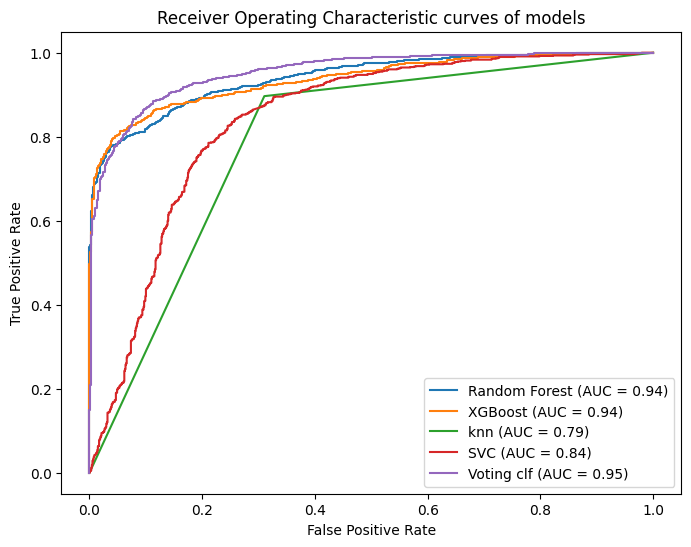

In [ ]:
# Define your models
models = {
    'Random Forest': rf_randomsearch.best_estimator_,
    'XGBoost': xgb_randomsearch.best_estimator_,
    'knn': knn_clf.best_estimator_,
    'SVC': svc_randomsearch.best_estimator_,
    'Voting clf':voting_clf
}

plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name)
    display.plot(ax=plt.gca())

plt.title('Receiver Operating Characteristic curves of models')
plt.show()

We can clearly observe how voting classifier improve upon previous models.

# **Conclusion**

1. K-Nearest Neighbors (KNN): The KNN model achieved perfect accuracy, precision, recall, and F1 score on the training data, indicating that it might be overfitting. This is further supported by its lower performance on the test data.

2. Random Forest: The Random Forest model showed good performance on both the training and test data, suggesting that it generalizes well to unseen data.

3. XGBoost: The XGBoost model also performed well on both the training and test data, indicating good generalization.

4. Support Vector Classifier (SVC): The SVC model had high performance on the training data but lower performance on the test data, suggesting potential overfitting.

5. Voting Classifier: The Voting Classifier, which combined predictions from multiple models, achieved perfect scores on the training data and high scores on the test data. This suggests that it was able to effectively leverage the strengths of its constituent models.

In conclusion, while all models showed good performance, the Random Forest and XGBoost models demonstrated the best balance between training and test performance, indicating good generalization. The Voting Classifier also showed high performance, benefiting from the ensemble approach.